This open dataset was obtained from kaggle.com. Here is the description, copied directly from the website:

###############################

When is my university campus gym least crowded, so I know when to work out? We measured how many people were in this gym once every 10 minutes over the last year. We want to be able to predict how crowded the gym will be in the future.

The dataset consists of 26,000 people counts (about every 10 minutes) over the last year. In addition, I gathered extra info including weather and semester-specific information that might affect how crowded it is. The label is the number of people, which I'd like to predict given some subset of the features.

Label:

Number of people
Features:

timestamp (int; number of seconds since beginning of day)
day_of_week (int; 0 - 6)
is_weekend (int; 0 or 1)
is_holiday (int; 0 or 1)
apparent_temperature (float; degrees fahrenheit)
temperature (float; degrees fahrenheit)
is_start_of_semester (int; 0 or 1)

###############################

Here, I intend to do a basic data exploration to better understand the context of the data. I primarily use pandas to load
and read the data and matplotlib to visualize them.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Reading the original csv file dowloaded from the website.

df = pd.read_csv('data.csv', sep=',')
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [39]:
df.tail()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19
62183,23,2017-03-18 19:22:51-07:00,69771,5,1,0,56.71,0,1,3,19


In [5]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [6]:
#The date seems to have additional information after the %Y-%m-%d %H:%M-%S.
#I would convert it to string, remove the last 6 character, and put it back into a new series.

date = df['date']

In [7]:
new_date = date.str[:-6]

In [8]:
new_date.head()

0    2015-08-14 17:00:11
1    2015-08-14 17:20:14
2    2015-08-14 17:30:15
3    2015-08-14 17:40:16
4    2015-08-14 17:50:17
Name: date, dtype: object

In [9]:
from datetime import datetime

In [10]:
#this is a very good way to get a series of timeseries type because we can pass it as a datetime index
#into other series or dataframes.

panda_date = pd.to_datetime(new_date)

In [11]:
panda_date.head()

0   2015-08-14 17:00:11
1   2015-08-14 17:20:14
2   2015-08-14 17:30:15
3   2015-08-14 17:40:16
4   2015-08-14 17:50:17
Name: date, dtype: datetime64[ns]

In [12]:
type(panda_date)

#It may only say series, but it is indeed a timeseries type. I wonder why panda says otherwise.

pandas.core.series.Series

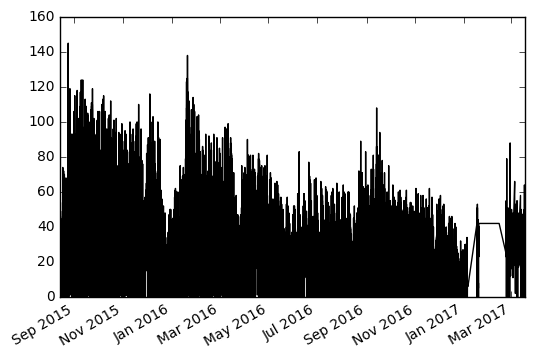

In [46]:
#Let us plot the entire number of attendance as a first attempt to visualize the data.

fig, ax = plt.subplots()
ax.plot(panda_date, df['number_people'], 'k-')

fig.autofmt_xdate()
import matplotlib.dates as mdates
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

In [ ]:
#its too cluttered.
#what we can do is only focus on the hours that the gym is opened
#we also want to focus only on one year. Let's focus on Sept 2015 to Sept 2016

#However, notice a trend that the number of attendance decreases towards 2017.

In [41]:
#Create a timeseries indexed by the timestamps. We will use the number of people as value.
#This timeseries series is useful because we can index by the date and/or the time instead of using integer 0-n.

ts = pd.Series(df['number_people'].tolist(), index=(panda_date))

In [42]:
ts.head()

date
2015-08-14 17:00:11    37
2015-08-14 17:20:14    45
2015-08-14 17:30:15    40
2015-08-14 17:40:16    44
2015-08-14 17:50:17    45
dtype: int64

In [91]:
ts.index

DatetimeIndex(['2015-08-14 17:00:11', '2015-08-14 17:20:14',
               '2015-08-14 17:30:15', '2015-08-14 17:40:16',
               '2015-08-14 17:50:17', '2015-08-14 18:00:18',
               '2015-08-14 18:20:08', '2015-08-14 18:30:09',
               '2015-08-14 18:40:14', '2015-08-14 18:50:15',
               ...
               '2017-03-18 17:52:12', '2017-03-18 18:02:15',
               '2017-03-18 18:12:19', '2017-03-18 18:22:21',
               '2017-03-18 18:32:25', '2017-03-18 18:42:28',
               '2017-03-18 18:52:35', '2017-03-18 19:02:40',
               '2017-03-18 19:12:47', '2017-03-18 19:22:51'],
              dtype='datetime64[ns]', name='date', length=62184, freq=None)

In [75]:
type(ts)

#Again it says that it is merely a series. Hmmpm...

pandas.core.series.Series

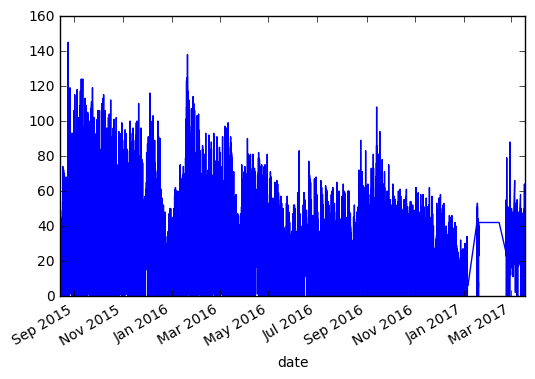

In [93]:
#plot the whole thang again
#this is gonna be messy

ts.plot()

In [44]:
#we can filter them in a timespan of a year, say, from August 2015-16
#Look how easy it is.

print(ts['2015-8':'2016-8'].head())
print(ts['2015-8':'2016-8'].tail())

date
2015-08-14 17:00:11    37
2015-08-14 17:20:14    45
2015-08-14 17:30:15    40
2015-08-14 17:40:16    44
2015-08-14 17:50:17    45
dtype: int64
date
2016-08-31 23:14:50    39
2016-08-31 23:24:51    34
2016-08-31 23:34:53    31
2016-08-31 23:44:54    25
2016-08-31 23:54:55    36
dtype: int64


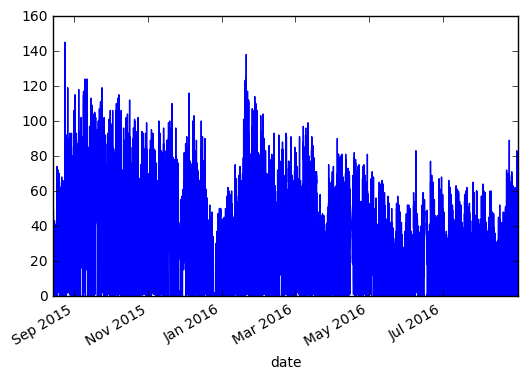

In [101]:
ts['2015-8':'2016-8'].plot()
#still messy

In [90]:
#I assume that the gym is open in between 0600 and 2359.
#Let us see how many observation falls in between this time
print(len(ts.between_time('06:00','23:59')))
print(len(ts))

50487
62184


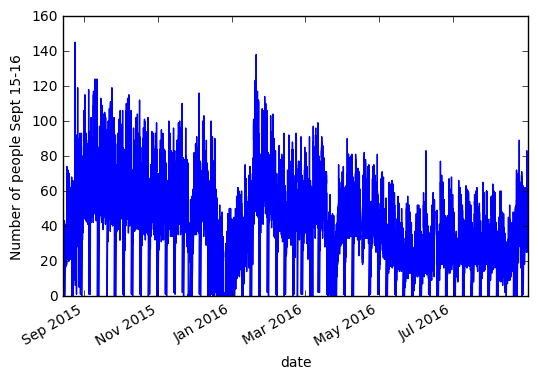

In [93]:
ts['2015-08':'2016-08'].between_time('10:00','23:59').plot()
plt.ylabel('Number of people Sept 15-16')
#Still a mess

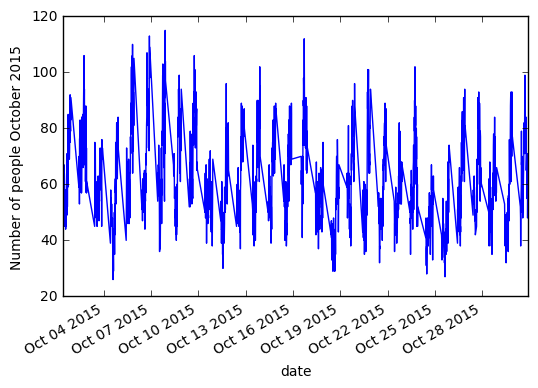

In [96]:
#Let's filter it only in a month, say, October, where it is in between the midterm and final exam
#I expect that the attendance would be in a regular and steady pace, in contrast to the beginning of the semeter,
#where the attendance is high, probably because people gets excited with the facilities or what not.

ts['2015-10-01':'2015-10-30'].between_time('10:00','22:00').plot()
plt.ylabel('Number of people October 2015')

#I think it is difficult to observe the trend in a given month or year because the data includes fluctuation in hourly basis
#What we need to to is resample them on daily or monthly basis
#We will do that shortly

In [104]:
#Let us do more analysis on a typical day 

ts['2016-9-01':'2016-9-02'].head()

#either: 1) this gym is opened 24/7 or3) there's always someone working at night like the janitor or patrol guard.

date
2016-09-01 00:02:16    36
2016-09-01 00:04:57    26
2016-09-01 00:14:59    31
2016-09-01 00:25:00    21
2016-09-01 00:35:01    15
2016-09-01 00:45:03    14
2016-09-01 00:55:04     9
2016-09-01 01:05:06     7
2016-09-01 01:15:07     5
2016-09-01 01:25:08     1
2016-09-01 01:35:08     0
2016-09-01 01:45:09     0
2016-09-01 01:55:10     0
2016-09-01 02:05:10     1
2016-09-01 02:15:11     1
2016-09-01 02:25:12     1
2016-09-01 02:35:12     0
2016-09-01 02:45:13     0
2016-09-01 02:55:14     1
2016-09-01 03:05:14     1
2016-09-01 03:15:15     0
2016-09-01 03:25:16     1
2016-09-01 03:35:17     1
2016-09-01 03:45:18     0
2016-09-01 03:55:18     0
2016-09-01 05:30:32     1
2016-09-01 05:40:33     1
2016-09-01 05:50:33     4
2016-09-01 06:00:34     4
2016-09-01 06:10:35     7
                       ..
2016-09-02 19:03:27    36
2016-09-02 19:13:29    40
2016-09-02 19:23:30    35
2016-09-02 19:33:32    41
2016-09-02 19:43:35    33
2016-09-02 19:53:37    34
2016-09-02 20:03:39    31
2016-09

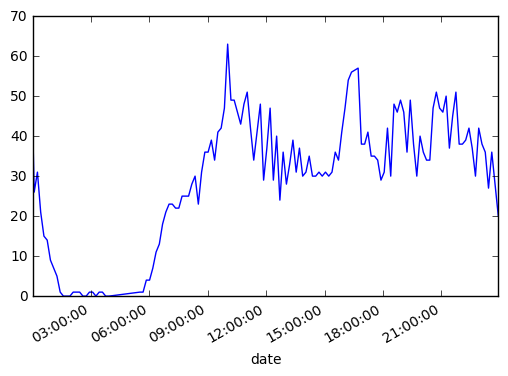

In [116]:
#ts['2016-9-01':'2016-9-02'].plot()
ts['2016-9-01 00:00:00 ':'2016-9-01 23:59:59'].plot()

#but what day is this? weekdays? weekends? semester break?
#it it Thu.

In [37]:
#We can create a new dataframe with the date as the index

df2 = df.drop(['date'], axis=1).set_index(np.array(panda_date))

#to make sure it works, we try to slice it using datetime method

df2['2016-09':'2016-12-31 21:00:00']

#it works

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
2016-09-01 00:02:16,36,136,3,0,0,59.54,1,1,9,0
2016-09-01 00:04:57,26,297,3,0,0,59.54,1,1,9,0
2016-09-01 00:14:59,31,899,3,0,0,59.54,1,1,9,0
2016-09-01 00:25:00,21,1500,3,0,0,59.54,1,1,9,0
2016-09-01 00:35:01,15,2101,3,0,0,59.54,1,1,9,0
2016-09-01 00:45:03,14,2703,3,0,0,59.54,1,1,9,0
2016-09-01 00:55:04,9,3304,3,0,0,59.54,1,1,9,0
2016-09-01 01:05:06,7,3906,3,0,0,58.70,1,1,9,1
2016-09-01 01:15:07,5,4507,3,0,0,58.70,1,1,9,1
2016-09-01 01:25:08,1,5108,3,0,0,58.70,1,1,9,1


In [43]:
df2.to_csv(r'data_datetimeIndexed.csv', sep=',')

In [3]:
#let us load df2 again from df
df = pd.read_csv('data.csv', sep=',')
date = df['date']
new_date = date.str[:-6]
panda_date = pd.to_datetime(new_date)
df2 = df.drop(['date'], axis=1).set_index(np.array(panda_date))
df2.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
2015-08-14 17:00:11,37,61211,4,0,0,71.76,0,0,8,17
2015-08-14 17:20:14,45,62414,4,0,0,71.76,0,0,8,17
2015-08-14 17:30:15,40,63015,4,0,0,71.76,0,0,8,17
2015-08-14 17:40:16,44,63616,4,0,0,71.76,0,0,8,17
2015-08-14 17:50:17,45,64217,4,0,0,71.76,0,0,8,17


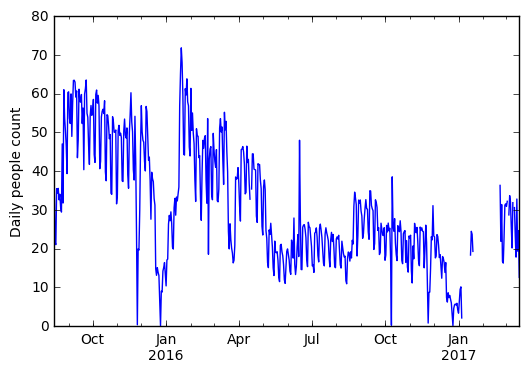

In [64]:
#Resample by daily average
number_people=df2['number_people']
daily=number_people.resample('D').mean()
#daily.plot(style=[':', '--', '-'])
daily.plot()
plt.ylabel('Daily people count');

#we can see there are certain amount of year, like a semester break, where all of a sudden the gym is empty
#Also, there is a trend that less and less people go to the gym. The fee got increased??

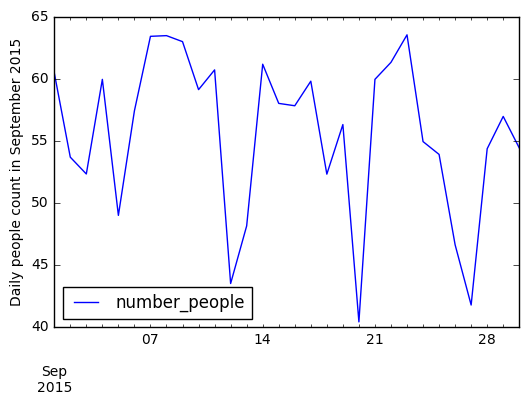

In [162]:
#resample by daily average for each month

number_people=df2.loc['2015-09-01':'2015-09-30',['number_people']]
daily=number_people.resample('D').mean()
#daily.plot(style=[':', '--', '-'])
daily.plot()
plt.ylabel('Daily people count in September 2015');

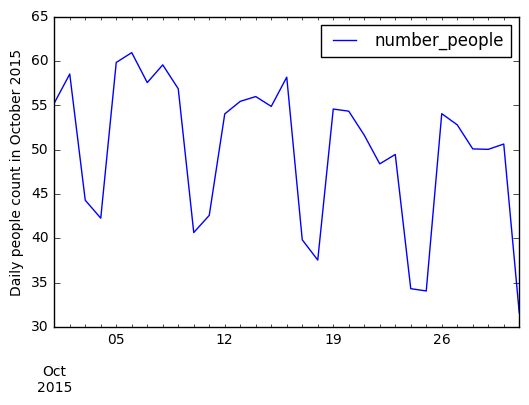

In [4]:
number_people2=df2.loc['2015-10-01':'2015-10-31',['number_people']]
daily2=number_people2.resample('D').mean()
daily2.plot()
plt.ylabel('Daily people count in October 2015');

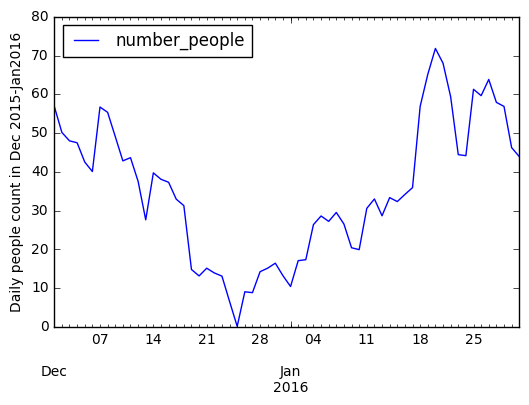

In [5]:
number_people3=df2.loc['2015-12-01':'2016-1-31',['number_people']]
daily3=number_people3.resample('D').mean()
daily3.plot()
plt.ylabel('Daily people count in Dec 2015-Jan2016');

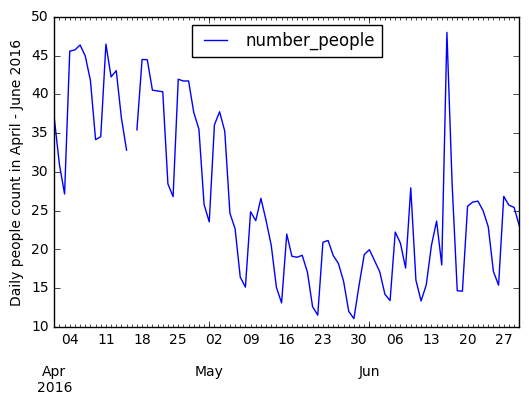

In [6]:
number_people4=df2.loc['2016-04-01':'2016-06-30',['number_people']]
daily4=number_people4.resample('D').mean()
daily4.plot()
plt.ylabel('Daily people count in April - June 2016');

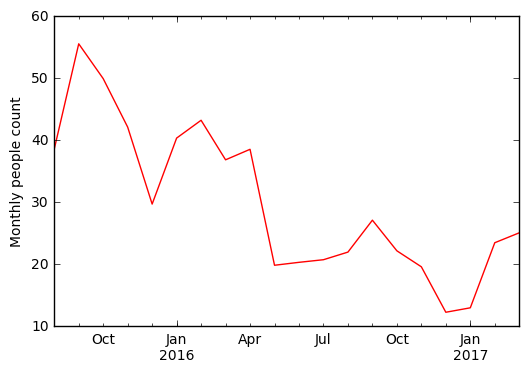

In [66]:
#Resample by monthly average
number_people=df2['number_people']
daily=number_people.resample('M').mean()
#daily.plot(style=[':', '--', '-'])
daily.plot(color='r')
plt.ylabel('Monthly people count');

#This proven that less and less people go to the gym.

In [21]:
print("total samples: ", len(df2))
print("weekend: ", len(df2[df2['is_weekend']==1]))
print("holiday: ", len(df2[df2['is_holiday']==1]))
print("start of semester: ", len(df2[df2['is_start_of_semester']==1]))
print("during semester: ", len(df2[df2['is_during_semester']==1]))

total samples:  62184
weekend:  17590
holiday:  160
start of semester:  4902
during semester:  41055


In [28]:
print("mean of temperature: ", df2['temperature'].mean())
print("median of temperature: ", df2['temperature'].median())
print("min of temperature: ", df2['temperature'].min())
print("max of temperature: ", df2['temperature'].max())

mean of temperature:  58.557107937734656
median of temperature:  58.34
min of temperature:  38.14
max of temperature:  87.17


# Temperature

I am interested to see if the temperature correlates strongly with attendance.

(array([    5.,    12.,    16.,    16.,    16.,    26.,    59.,    37.,
           83.,    93.,    87.,   152.,   176.,   245.,   232.,   276.,
          414.,   389.,   519.,   469.,   529.,   530.,   572.,   543.,
          895.,   587.,   762.,   836.,   893.,   800.,   857.,   906.,
         1271.,  1383.,  1883.,  2201.,  2318.,  2297.,  2214.,  2366.,
         2425.,  2530.,  1758.,  1998.,  2053.,  1913.,  1714.,  2020.,
         1852.,  1543.,  1645.,  1266.,  1515.,  1052.,  1024.,   753.,
         1209.,   636.,   627.,   515.,   489.,   419.,   333.,   234.,
          291.,   331.,   176.,   187.,   170.,   197.,   135.,   186.,
           83.,    88.,    59.,    65.,    34.,    65.,    53.,    63.,
           48.,    11.,    46.,    73.,    34.,    51.,    21.,    48.,
           43.,    22.,    12.,    16.,     0.,    39.,    17.,    11.,
            5.,     0.,    11.,     5.]),
 array([ 38.14  ,  38.6303,  39.1206,  39.6109,  40.1012,  40.5915,
         41.0818,  41.5721

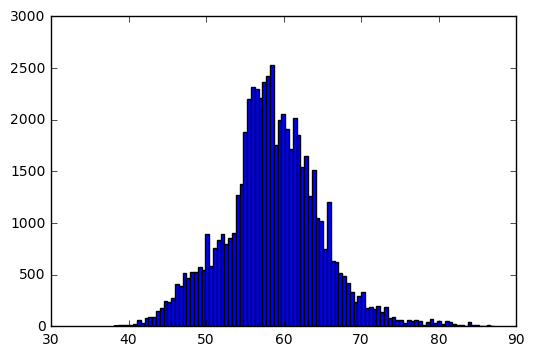

In [32]:
fig, ax = plt.subplots()
ax.hist(df2['temperature'], bins=100)

Looks like the temperature is noted in Fahrenheit, and it goes as low as almost freezing temperature and as high as 87.
We can speculate that the gym is located in a region that receives four seasons, but does not receive extreme winter or summer.
It is probably located in the Pacific Northwest or South Atlantic Region.

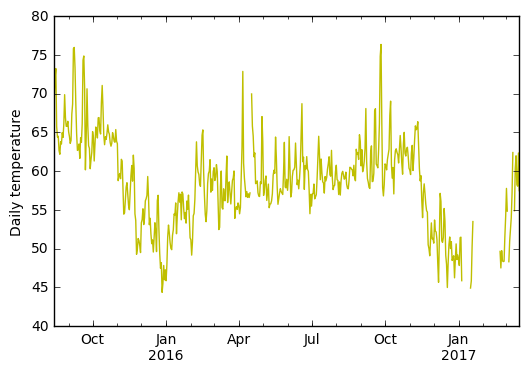

In [67]:
temperature = df2['temperature']
temperature_daily=temperature.resample('D').mean()
temperature_daily.plot(color='y')
plt.ylabel('Daily temperature')

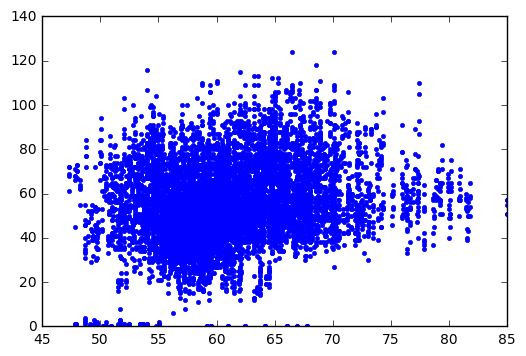

In [155]:
#plot number_people vs temperature in between 2015-2016
#during the semester
#weekdays
#not holiday
#between 10am-10pm

temp = df2[(df2['is_holiday']==0) & (df2['is_start_of_semester']==0) & 
           (df2['is_during_semester']==1) & (df2['is_weekend']==0)].between_time('10:00','22:00')
temp = temp['2015-09':'2016-08']
temp1 = np.array(temp['number_people'])
temp2 = np.array(temp['temperature'])

#temp=df2.loc[:,['number_people', 'temperature']].between_time('06:00','23:59')
#temp1 = df2.loc[:,['number_people']].between_time('06:00','23:59')
#df2['number_people'].between_time('06:00','23:59')
#temp1= np.array(df2['number_people'].between_time('2016-09-01','between_time('10:00','23:59'))
#temp2= np.array(df2['temperature'].between_time('10:00','23:59'))
#fig, ax = plt.subplots()

#ax.plot(df['number_people'], df['temperature'], '.', alpha=0.5)
plt.plot(temp2, temp1, '.')


Looks like there is no strict correlation in between the temperature and the number of attendance.